In [1]:
import http.client
import json
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#if data is in a csv file then jump to 47th cell
#otherwise, jump to 1st cell
#read data from csv file if it exists


if os.path.isfile('monks.csv'):
    df = pd.read_csv('monks.csv')
    print(df)
else:
    df=pd.DataFrame()


         id  sport_id  league_id  season_id  stage_id  group_id  aggregate_id  \
0    233400         1        384        802      1470       NaN           NaN   
1    233402         1        384        802      1470       NaN           NaN   
2    233404         1        384        802      1470       NaN           NaN   
3    233406         1        384        802      1470       NaN           NaN   
4    233408         1        384        802      1470       NaN           NaN   
..      ...       ...        ...        ...       ...       ...           ...   
645   92577         1         82        208       492       NaN           NaN   
646   92578         1         82        208       492       NaN           NaN   
647   92579         1         82        208       492       NaN           NaN   
648   92580         1         82        208       492       NaN           NaN   
649   92581         1         82        208       492       NaN           NaN   

     round_id  state_id  ve

In [3]:

''' 
    AutToken='NFKDUEzEPM3LcVc57jl4RD3xmflyJEoTXSfKlSqc42XzTHcBiwYqKnDflK5O'
    request=requests.get(f'https://api.sportmonks.com/v3/football/leagues', headers={'Authorization': AutToken})
    
    data=request.json()
    df=pd.DataFrame(data['data'])
    #interested leagues : 382,8,564,301,82
    #interested leagues_names : 'Premier League','LaLiga','Serie A','Bundesliga','Ligue 1'
    df=df[df["name"].isin(['Premier League','LaLiga','Serie A','Bundesliga','Ligue 1'])]
    df.to_csv('leagues.csv',index=False)
    leagues_ids=df['id'].tolist()
'''

' \n    AutToken=\'NFKDUEzEPM3LcVc57jl4RD3xmflyJEoTXSfKlSqc42XzTHcBiwYqKnDflK5O\'\n    request=requests.get(f\'https://api.sportmonks.com/v3/football/leagues\', headers={\'Authorization\': AutToken})\n    \n    data=request.json()\n    df=pd.DataFrame(data[\'data\'])\n    #interested leagues : 382,8,564,301,82\n    #interested leagues_names : \'Premier League\',\'LaLiga\',\'Serie A\',\'Bundesliga\',\'Ligue 1\'\n    df=df[df["name"].isin([\'Premier League\',\'LaLiga\',\'Serie A\',\'Bundesliga\',\'Ligue 1\'])]\n    df.to_csv(\'leagues.csv\',index=False)\n    leagues_ids=df[\'id\'].tolist()\n'

In [28]:

    AutToken='NFKDUEzEPM3LcVc57jl4RD3xmflyJEoTXSfKlSqc42XzTHcBiwYqKnDflK5O'
    page=1
    leagues_ids=[384,8,564,301,82]
    request=requests.get('https://api.sportmonks.com/v3/football/fixtures?include=events;lineups;participants&filters=fixtureLeagues:384,382,8,564,301,82&order=asc', headers={'Authorization': AutToken})
    data=request.json()
    df = pd.DataFrame(data['data'])
    for league in leagues_ids:
        page=1
        while page<=5 and data["pagination"]["has_more"]:
            page+=1
            request=requests.get('https://api.sportmonks.com/v3/football/fixtures/?include=events;lineups;participants&filters=fixtureLeagues:{league}&page={page}&order=asc', headers={'Authorization': AutToken})
            data=request.json()
            print(data)
            if 'data' in data:
                # Append the data to the DataFrame
                dataframe=pd.DataFrame(data['data'])
                df = pd.concat([df, dataframe], ignore_index=True)
            else:
                # Break out of the loop if there is no 'data' key in the response
                break
    data
    #order data by date
    df=df.sort_values(by=['starting_at'])
    df.to_csv('monks.csv',index=False)

{'message': 'Invalid request parameters', 'errors': {'date': ['The date does not match the format Y-m-d.']}}


KeyError: 'pagination'

## GET MATCHES

In [ ]:


# Parse the JSON data and create a dataframe


#pop events column
events = df.pop('events')
match_results=[]
events

match_results=[]
for match_Events in events:
   results = []
   for event in match_Events:
      if event["type_id"] == 15 or event["type_id"] == 14:
            results.append(event["result"])
   match_results.append(results[-1])



match_results 
df["match_results"]=match_results


home_team_id=[]
away_team_id=[]
home_team_name=[]
away_team_name=[]
for teams in df["participants"]:
   home_team_id.append(teams[0]["id"])
   away_team_id.append(teams[1]["id"])
   home_team_name.append(teams[0]["name"])
   away_team_name.append(teams[1]["name"])
df["home_team"]=home_team_id
df["away_team"]=away_team_id
df["home_team_name"]=home_team_name
df["away_team_name"]=away_team_name


home_team_players_name=[]
away_team_players_name=[]
home_team_players_id=[]
away_team_players_id=[]
for index,teams in enumerate(df["lineups"]):
   htn=[]
   atn=[]
   hti=[]
   ati=[]
   for player in teams:
      if player["team_id"]==df["home_team"][index]:
            htn.append(player["player_name"])
            hti.append(player["player_id"])
      else:
            atn.append(player["player_name"])
            ati.append(player["player_id"])
   home_team_players_name.append(htn)
   away_team_players_name.append(atn)
   home_team_players_id.append(hti)
   away_team_players_id.append(ati)
df["home_team_players_name"]=home_team_players_name
df["home_team_players_id"]=home_team_players_id
df["away_team_players_name"]=away_team_players_name
df["away_team_players_id"]=away_team_players_id

   ##remove useless columns
df.pop("lineups")
df.pop("participants")
df.pop("venue_id")
df.pop("starting_at")
df.pop("leg")
df.pop("details")
df.pop("length")
df.pop("sport_id")
df.pop("league_id")
df.pop("season_id")
df.pop("stage_id")
df.pop("group_id")
df.pop("aggregate_id")
df.pop("round_id")
df.pop("state_id")
df.pop("placeholder")
df.pop("has_odds")
df.pop("starting_at_timestamp")
df.pop("name")
df.pop("result_info")
df.to_csv("monks.csv")
df


IndexError: list index out of range

## stadardize, and plot


In [ ]:
#create a standardized dictionary with ids in order 
teams_id={}
for teams in df["home_team"]:
   if teams not in teams_id:
      teams_id[teams]=len(teams_id)
for teams in df["away_team"]:
   if teams not in teams_id:
      teams_id[teams]=len(teams_id)
teams_id

KeyError: 'home_team'

id               233400
match_results       3-2
home_team           109
away_team            43
Name: 0, dtype: object
id               233402
match_results       1-1
home_team           708
away_team           113
Name: 1, dtype: object
id               233404
match_results       1-2
home_team          2930
away_team          2714
Name: 2, dtype: object
id               233406
match_results       1-1
home_team           522
away_team            97
Name: 3, dtype: object
id               233408
match_results       3-1
home_team           585
away_team           397
Name: 4, dtype: object
id               233410
match_results       1-0
home_team          1216
away_team           102
Name: 5, dtype: object
id               233412
match_results       0-5
home_team           597
away_team           613
Name: 6, dtype: object
id               233414
match_results       3-1
home_team          1343
away_team          8513
Name: 7, dtype: object
id               233416
match_results       1-0


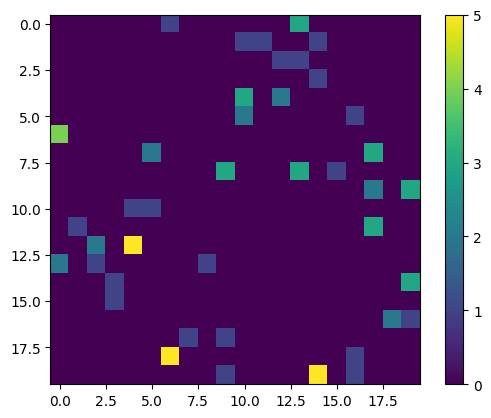

In [ ]:
plot_data=df[["id","match_results","home_team","away_team"]]
teams_goals={}
for index, row in plot_data.iterrows():
    print(row)
    if teams_id[row["home_team"]] not in teams_goals:
        teams_goals[teams_id[row["home_team"]]]={}
    if teams_id[row["away_team"]] not in teams_goals:
        teams_goals[teams_id[row["away_team"]]]={}
    home_goals,away_goals=row["match_results"].split("-")
    home_goals=int(home_goals)
    away_goals=int(away_goals)
    if teams_goals[teams_id[row["home_team"]]].get(teams_id[row["away_team"]]) is None:
        teams_goals[teams_id[row["home_team"]]][teams_id[row["away_team"]]]=home_goals
    else:
        teams_goals[teams_id[row["home_team"]]][teams_id[row["away_team"]]]+=home_goals
    if teams_goals[teams_id[row["away_team"]]].get(teams_id[row["home_team"]]) is None:
        teams_goals[teams_id[row["away_team"]]][teams_id[row["home_team"]]]=away_goals
    else:
        teams_goals[teams_id[row["away_team"]]][teams_id[row["home_team"]]]+=away_goals

#plot_data new imae for each team

#pot the matrix ogngoals of each team against each other
#teams_goals

'''

for team in teams_goals:
    print(team)
    print(teams_goals[team])
    plt.scatter(teams_goals[team].keys(),teams_goals[team].values())
    plt.yticks(range(0,10,1))
    plt.title(team)
    plt.show()
    '''
import numpy as np
import matplotlib.pyplot as plt
matrix=np.zeros((len(teams_id),len(teams_id)))
for team in teams_goals:
    for team2 in teams_goals[team]:
        matrix[team][team2]=teams_goals[team][team2]
plt.imshow(matrix)
plt.colorbar()
plt.show()

    
